### Advanced Python AI and ML Tools - Assignment 1

__Group Members:__
1) Aanal Patel - C0910376
2) Bimal Shresta - C0919385
3) Danilo Diaz - C0889539
4) Ernie Sumoso - C0881591

### Index
- __Step 1. Dataset Description (web scrapped)__
- __Step 2. Data Wrangling (cleaning, formatting, structuring, validating)__
    - __Step 9. NLP techniques: data cleaning, stopword and puctuation removal, tokenizing, ngrams analysis__
- __Step 3. Plotting methods for distribution__
- __Step 4. Pandas profiling for EDA (exploratory data analysis)__
- __Step 5. Encoding methods, creating new numerical columns__
- __Step 6. Outlier identification (with boxplots and IQR)__
- __Step 7. Addressing outliers with Quantile-based flooring and capping, Trimming, and Log Transformation__
- __Step 8. Unsupervised learning methods__

### Step 1. Dataset Description (web scrapped)

(Bimal add a description of what you did to web scrap the data here, what is the source and what were your steps)

In [1]:
import pandas as pd

# reading the web scrapped data from CSV file, setting the index column
df = pd.read_csv("job_data.csv", index_col=0)

# displaying the raw data
df.tail()

,job_title,company,salary,job_location,post,job_type,job_desc,company_qns,job_posted_date,job_link
2610,Level 2/3 Support Engineer,Fuse Technology Pty Ltd,NaN,Sydney NSW,Help Desk & IT Support (Information & Communic...,Full time,The opportunityAs part of our exciting growth ...,Which of the following statements best describ...,2024-02-21,https://www.seek.com.au/job/73930150?type=stan...
2611,NIGHT SHIFT WAREHOUSE TEAM LEADER WANTED WETHE...,Labourforce,$47 per hour + penalties,"Wetherill Park, Sydney NSW","Warehousing, Storage & Distribution (Manufactu...",Contract/Temp,Our client is one of Australia's leading Manuf...,NaN,2024-02-21,https://www.seek.com.au/job/73870879?type=stan...
2612,Casual Retail Assistant,Independent Living Specialists,"$31.11 per hour, plus super","Randwick, Sydney NSW",Retail Assistants (Retail & Consumer Products),Casual/Vacation,Independent Living Specialists is a fast-growi...,Do you have customer service experience?Do you...,2024-02-21,https://www.seek.com.au/job/73899163?type=stan...
2613,Studio Assistant,Cendre,NaN,"Oxenford, Gold Coast QLD","Pickers & Packers (Manufacturing, Transport & ...",Full time,Cendré is a revered e-commerce jewellery brand...,NaN,2024-02-21,https://www.seek.com.au/job/73875587?type=stan...
2614,Junior IT Support Officer,Hare & Forbes,NaN,"Northmead, Sydney NSW",Help Desk & IT Support (Information & Communic...,Full time,"Parramatta locationWork with a close-knit, exp...",Do you have demonstrated experience diagnosing...,2024-02-21,https://www.seek.com.au/job/73868216?type=stan...


In [2]:
# display the number of rows, columns and the column names
def display_shape_and_colnames(df):
    print("Number of Rows:", df.shape[0])
    print("Number of Columns:", df.shape[1])
    print(df.columns)
    
display_shape_and_colnames(df)

Number of Rows: 9800
Number of Columns: 10
Index(['job_title', 'company', 'salary', 'job_location', 'post', 'job_type',
       'job_desc', 'company_qns', 'job_posted_date', 'job_link'],
      dtype='object')


Some of our __column names__ are __redundant__ because we are working with job data.

Let's delete the prefix __"job"__ from our column names.

Some other __column names__ are __abbreviated__ (e.g. "job_desc", "company_qns").

Let's __replace them with full names__ so we can have accurate column names.

In [3]:
def clean_colnames(df):
    # delete the prefix "job_" on our column names
    for column_name in df.columns.to_list():
        if column_name.startswith("job_"):
            df.rename(columns={column_name : column_name.lstrip("job_")}, inplace=True)

    # rename abbreviated column names
    df.rename(columns={'desc':'description', 'company_qns':'company_questions', 'post':'department'}, inplace=True)

clean_colnames(df)
# display clean column names
df.head(2)

,title,company,salary,location,department,type,description,company_questions,posted_date,link
0,Experienced Support Worker (PPT & CAS),Ability Gateway,$35.50 per hour [PPT],"Wagga Wagga, Wagga Wagga & Riverina NSW",Aged & Disability Support (Community Services ...,Part time,About usWe are an outcome focused NDIS service...,Do you own or have regular access to a car?Whi...,2024-02-21,https://www.seek.com.au/job/73909631?type=prom...
1,Regional Manager - Inspire@HOME,CatholicCare Tasmania,NaN,"Launceston, Launceston & North East TAS","Child Welfare, Youth & Family Services (Commun...",Full time,CatholicCare Tasmania is the primary social se...,NaN,2024-02-21,https://www.seek.com.au/job/73909232?type=prom...


Now let's undestand all of our columns by providing a description to each one:
- __title__: title of the posted job
- __company__: name of the company that has posted the job
- __salary__: salary range for the job, can be defined per hour, monthly, annually, etc.
- __location__: geographical location of the job or company
- __department__: field or department of the job (e.g. IT, Sales, etc.)
- __description__: long description of the job posting
- __company_questions__: questions issued by the company to the applicants, according to the post
- __posted_date__: format yyyy-mm-dd
- __link__: link of the job posting

Now that we have a general understanding of our web scrapped data. 

Let's go ahead to the next step to perform our data wrangling methods.

### __Step 2.__ Data Wrangling (cleaning, formatting, structuring, validating)
### (includes __Step 9.__ NLP techniques: data cleaning, stopword and puctuation removal, tokenizing, ngrams analysis)

First of all, we have 9800 rows, however the index values are repetead thrice because of the CSV contents.

Let's start by reseting the index to have proper index values.

In [4]:
# reset the rows index
df.reset_index(inplace=True, drop=True)
df.tail()

,title,company,salary,location,department,type,description,company_questions,posted_date,link
9795,Level 2/3 Support Engineer,Fuse Technology Pty Ltd,NaN,Sydney NSW,Help Desk & IT Support (Information & Communic...,Full time,The opportunityAs part of our exciting growth ...,Which of the following statements best describ...,2024-02-21,https://www.seek.com.au/job/73930150?type=stan...
9796,NIGHT SHIFT WAREHOUSE TEAM LEADER WANTED WETHE...,Labourforce,$47 per hour + penalties,"Wetherill Park, Sydney NSW","Warehousing, Storage & Distribution (Manufactu...",Contract/Temp,Our client is one of Australia's leading Manuf...,NaN,2024-02-21,https://www.seek.com.au/job/73870879?type=stan...
9797,Casual Retail Assistant,Independent Living Specialists,"$31.11 per hour, plus super","Randwick, Sydney NSW",Retail Assistants (Retail & Consumer Products),Casual/Vacation,Independent Living Specialists is a fast-growi...,Do you have customer service experience?Do you...,2024-02-21,https://www.seek.com.au/job/73899163?type=stan...
9798,Studio Assistant,Cendre,NaN,"Oxenford, Gold Coast QLD","Pickers & Packers (Manufacturing, Transport & ...",Full time,Cendré is a revered e-commerce jewellery brand...,NaN,2024-02-21,https://www.seek.com.au/job/73875587?type=stan...
9799,Junior IT Support Officer,Hare & Forbes,NaN,"Northmead, Sydney NSW",Help Desk & IT Support (Information & Communic...,Full time,"Parramatta locationWork with a close-knit, exp...",Do you have demonstrated experience diagnosing...,2024-02-21,https://www.seek.com.au/job/73868216?type=stan...


Now, let's perform some basic analysis on our dataset.

We will check the following stats by implementing functions:
- missing values per column
- duplicated rows
- number of unique values per column

In [5]:
def check_missing_values(df):
    # check for number of missing values per column
    print("# Missing Values")
    print(df.isna().sum())
    
    # check for % of missing values
    print("\n% Missing Values")
    print(df.isna().mean() * 100)
    
check_missing_values(df)

# Missing Values
title                   0
company                 0
salary               5216
location                0
department              0
type                    0
description             0
company_questions    5034
posted_date             0
link                    0
dtype: int64

% Missing Values
title                 0.000000
company               0.000000
salary               53.224490
location              0.000000
department            0.000000
type                  0.000000
description           0.000000
company_questions    51.367347
posted_date           0.000000
link                  0.000000
dtype: float64


As expected, many job posts do not include a salary range or any information about the salary.

It is no surprise that __more than half of our data has missing values for salary__.

We also have __more than half missing values for the company questions column__.

In [6]:
def check_duplicated_values(df):
    # check for number of duplicated values
    print("# Duplicated Values")
    print(df.duplicated().sum())
    
    # check for % of duplicated values
    print("\n% Duplicated Values")
    print(df.duplicated().mean() * 100)

check_duplicated_values(df)

df[df.duplicated()].tail(4)

# Duplicated Values
944

% Duplicated Values
9.63265306122449


,title,company,salary,location,department,type,description,company_questions,posted_date,link
9772,Pick Packers,Action Workforce,35,"Maddington, Perth WA","Warehousing, Storage & Distribution (Manufactu...",Casual/Vacation,Action Workforce are looking for Experienced P...,NaN,2024-02-21,https://www.seek.com.au/job/73901168?type=stan...
9778,Accounts Person- KALGOORLIE RESIDENTS ONLY,Golden mile cleaning services,$30 – $33.50 per hour,"Kalgoorlie, Kalgoorlie, Goldfields & Esperance WA",Administrative Assistants (Administration & Of...,Part time,Job Title: Accounts Person We are currently se...,Which of the following statements best describ...,2024-02-21,https://www.seek.com.au/job/73908087?type=prom...
9788,Warehouse Assistant,Omni Recruit,NaN,"Truganina, Melbourne VIC","Pickers & Packers (Manufacturing, Transport & ...",Casual/Vacation,Business is booming and we are currently seeki...,Do you agree to the privacy policy of Omni Rec...,2024-02-20,https://www.seek.com.au/job/73863322?type=stan...
9797,Casual Retail Assistant,Independent Living Specialists,"$31.11 per hour, plus super","Randwick, Sydney NSW",Retail Assistants (Retail & Consumer Products),Casual/Vacation,Independent Living Specialists is a fast-growi...,Do you have customer service experience?Do you...,2024-02-21,https://www.seek.com.au/job/73899163?type=stan...


Some considerable amount of our data __(around 9.5%) are duplicated__ rows.

This can be __dangerous for analysis__, we have to __deal with these duplicated values__ in future steps.

In [7]:
def check_nunique_values(df):
    # check number of unique values per column
    print("# Unique Values per Column")
    for col in df.columns:
        print("'"+col+"'", "# of unique values:", df[col].nunique())
        
    # check % of unique values per column (relative to number of total rows in the dataset)
    print("\n% Unique Values per Column")
    for col in df.columns:
        print("'"+col+"'", "% of unique values:", round(df[col].nunique() * 100 / df.shape[0], 2), "%")
        
check_nunique_values(df)

# Unique Values per Column
'title' # of unique values: 5655
'company' # of unique values: 4965
'salary' # of unique values: 2645
'location' # of unique values: 1448
'department' # of unique values: 451
'type' # of unique values: 8
'description' # of unique values: 7958
'company_questions' # of unique values: 2730
'posted_date' # of unique values: 95
'link' # of unique values: 8664

% Unique Values per Column
'title' % of unique values: 57.7 %
'company' % of unique values: 50.66 %
'salary' % of unique values: 26.99 %
'location' % of unique values: 14.78 %
'department' % of unique values: 4.6 %
'type' % of unique values: 0.08 %
'description' % of unique values: 81.2 %
'company_questions' % of unique values: 27.86 %
'posted_date' % of unique values: 0.97 %
'link' % of unique values: 88.41 %


Some of our columns have a __large amount of unique values__.

The with vast amount of unique values __(>50% of total rows)__.
- title
- company
- description
- link

We will start with some basic cleaning applying some NLP methods that includes:
- removing punctuation
- removing digits
- apply lower case to all letters
- removing extra whitespaces

We will start dealing with the following columns:
- title
- company
- location

For this, we will implement classes that __contain NLP methods/techniques__, this code can be re-used later for other columns like 'description', etc.


In [8]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import string
import re

# class containing our implemented NLP techniques and methods
class NLP():
    
    # remove all punctuation from a word (string)
    def remove_punctuation(self, word):
        if not isinstance(word, str): return word
        return word.translate(str.maketrans('', '', string.punctuation))
    
    # remove all digits/numbers from a word (string)
    def remove_digits(self, word):
        if not isinstance(word, str): return word
        return re.sub(r'\d+', '', word)
    
    # checks if word is a string and returns lower cased
    def lower_word(self, word):
        if not isinstance(word, str): return word
        return word.lower()

    # perform basic operations to clean 1 column of a dataframe
    def basic_clean_text_column(self, df, colname):
        print("Basic cleaning on column '" + colname + "':")
        nunique = df[colname].nunique()
        print("# Unique values before cleaning:", df[colname].nunique())
        for value in df[colname].unique():
            # save original value to replace later
            og_value = value
            
            # if we are dealing with a null value, don't modify anything
            if value is np.nan: continue
            
            # remove punctuation from the column value
            value = self.remove_punctuation(str(value))
            
            # remove digits from column value
            value = self.remove_digits(value)
            
            # lower case column value
            value = self.lower_word(value)
            
            # word tokenize the column value
            word_tokens = word_tokenize(value)
            
            # update df value in place
            df[colname].replace(og_value, ' '.join(word_tokens), inplace=True)
        new_nunique = df[colname].nunique()
        print("# Unique values after cleaning:", df[colname].nunique())
        print("% of unique values reduction:", round(100 - (new_nunique*100/nunique),2), "%")
    

Now that we have implemented a class for our methods,

let's go ahead and __apply a basic cleaning on all our columns__.

Then, we can __compare values before vs after cleaning__.

In [9]:
def clean_and_compare_column(df, colname):
    # save raw title data into a new dataframe just to compare before vs after cleaning
    df_compare = df[[colname]].copy()

    # perform the basic cleaning on the title column
    nlp = NLP()
    nlp.basic_clean_text_column(df, colname)

    # compare before vs after
    df_compare["clean "+colname] = df[colname]
    display(df_compare)

clean_and_compare_column(df, 'title')

Basic cleaning on column 'title':
# Unique values before cleaning: 5655
# Unique values after cleaning: 5541
% of unique values reduction: 2.02 %


,title,clean title
0,Experienced Support Worker (PPT & CAS),experienced support worker ppt cas
1,Regional Manager - Inspire@HOME,regional manager inspirehome
2,Family Support Worker,family support worker
3,CPS Case Manager,cps case manager
4,Intake Worker,intake worker
...,...,...
9795,Level 2/3 Support Engineer,level support engineer
9796,NIGHT SHIFT WAREHOUSE TEAM LEADER WANTED WETHE...,night shift warehouse team leader wanted wethe...
9797,Casual Retail Assistant,casual retail assistant
9798,Studio Assistant,studio assistant


After this __1st experiment__ of __cleaning the 'title' column__ we notice that we have __reduced the number of unique values by 114__.

Which is equivalent of aproximately __2% of the total unique values__, __not a significant reduction__.

However, we have considerably clean our raw texts, and this will allow us to apply further NLP techniques that will have better results.

Let's also __apply the same basic cleaning on the other 2 columns:__
- company
- location

In [10]:
# define the remaining text columns that we need to perform a basic clean
text_cols = ['company', 'location']

# implement a function to perform the cleaning on these columns
def clean_and_compare_columns(df, cols):
    for colname in cols:
        clean_and_compare_column(df, colname)

# call the implemented function
clean_and_compare_columns(df, text_cols)

Basic cleaning on column 'company':
# Unique values before cleaning: 4965
# Unique values after cleaning: 4965
% of unique values reduction: 0.0 %


,company,clean company
0,Ability Gateway,ability gateway
1,CatholicCare Tasmania,catholiccare tasmania
2,Community Gro,community gro
3,Open Minds,open minds
4,The Centre for Women & Co.,the centre for women co
...,...,...
9795,Fuse Technology Pty Ltd,fuse technology pty ltd
9796,Labourforce,labourforce
9797,Independent Living Specialists,independent living specialists
9798,Cendre,cendre


Basic cleaning on column 'location':
# Unique values before cleaning: 1448
# Unique values after cleaning: 1448
% of unique values reduction: 0.0 %


,location,clean location
0,"Wagga Wagga, Wagga Wagga & Riverina NSW",wagga wagga wagga wagga riverina nsw
1,"Launceston, Launceston & North East TAS",launceston launceston north east tas
2,"Townsville, Northern QLD",townsville northern qld
3,"Nambour, Sunshine Coast QLD",nambour sunshine coast qld
4,"Underwood, Brisbane QLD",underwood brisbane qld
...,...,...
9795,Sydney NSW,sydney nsw
9796,"Wetherill Park, Sydney NSW",wetherill park sydney nsw
9797,"Randwick, Sydney NSW",randwick sydney nsw
9798,"Oxenford, Gold Coast QLD",oxenford gold coast qld


Let's take a look to the entire __dataframe__ in the __current clean version__.

In [11]:
# display our current dataframe version
df.head()

,title,company,salary,location,department,type,description,company_questions,posted_date,link
0,experienced support worker ppt cas,ability gateway,$35.50 per hour [PPT],wagga wagga wagga wagga riverina nsw,Aged & Disability Support (Community Services ...,Part time,About usWe are an outcome focused NDIS service...,Do you own or have regular access to a car?Whi...,2024-02-21,https://www.seek.com.au/job/73909631?type=prom...
1,regional manager inspirehome,catholiccare tasmania,NaN,launceston launceston north east tas,"Child Welfare, Youth & Family Services (Commun...",Full time,CatholicCare Tasmania is the primary social se...,NaN,2024-02-21,https://www.seek.com.au/job/73909232?type=prom...
2,family support worker,community gro,$40 – $44 per hour,townsville northern qld,"Child Welfare, Youth & Family Services (Commun...",Full time,Community Gro Inc is a community-based non-pro...,Which of the following statements best describ...,2024-02-19,https://www.seek.com.au/job/73832771?type=stan...
3,cps case manager,open minds,$82k – 84k + super + salary packaging + benefits,nambour sunshine coast qld,Community Development (Community Services & De...,Full time,As a Case Manager for Coastal Supports at Open...,NaN,2024-02-21,https://www.seek.com.au/job/73901240?type=stan...
4,intake worker,the centre for women co,$41 – $42 per hour,underwood brisbane qld,"Child Welfare, Youth & Family Services (Commun...",Full time,About Us and Our Team Culture At The Centre ...,Which of the following statements best describ...,2024-02-20,https://www.seek.com.au/job/73861002?type=stan...


We have seen __lots of stopwords accross our dataset__.

Our next step for cleaning is to remove all those stopwords.

However, we must __pay attention to certain words that have important meaning and at the same time are considered stopwords__.

- __Example:__ The most common meaning of __"it"__ is considered a stopword. However, "it" in job postings may refer to "Information Technologies".

Let's start by identifying words of 1, 2, and 3 characters long, so we can __identify which ones to remove, and which ones to keep__.

In [12]:
# return a list of lists, each list will contain the words of length 1, 2, 3... n
def identify_words_len_1_to_n(df, colname, n):
    # set n number of empty lists
    words = [[] for _ in range(n)]
    
    # loop through unique values of the column
    for value in df[colname].unique():
        # if it's not a string, go to the next value
        if not isinstance(value, str): continue
        
        # tokenize the value, loop through the words, if the word length its in range, add them to corresponding list
        tokens = word_tokenize(value)
        for word in tokens:
            if len(word) <= n:
                words[len(word)-1].append(word)
                
    # delete repeated values in the lists and sort them
    words_len_1_to_n = [sorted(list(set(words_sublist))) for words_sublist in words]
    
    # print the results (each list)
    print("Words of length 1 to", n, "on column '"+colname+"'")
    for i in range(n):
        print("- Words Length", i+1)
        print(words_len_1_to_n[i])
    return words_len_1_to_n

def identify_words_len_1_to_n_columns(df, text_columns, ns):
    # loop through the specified columns and identify the words of length 1 to n
    words_per_col = []
    for i, colname in enumerate(text_columns):
        words_per_col.append(identify_words_len_1_to_n(df, colname, ns[i]))
        print("\n")
    return words_per_col

# define the word lengths per text column
text_cols = ['title', 'company', 'location']
word_max_lens = [3, 2, 1]
print("Text columns:", text_cols, end='\n')
print("Finding words of length:", word_max_lens, end='\n\n')
words_per_col = identify_words_len_1_to_n_columns(df, text_cols, word_max_lens)

Text columns: ['title', 'company', 'location']
Finding words of length: [3, 2, 1]

Words of length 1 to 3 on column 'title'
- Words Length 1
['a', 'd', 'f', 'i', 'k', 'l', 'm', 'n', 'p', 's', 't', 'v', 'w', 'x', 'y', '–', '’', '💡', '🤝']
- Words Length 2
['ah', 'ai', 'am', 'an', 'ao', 'ap', 'ar', 'as', 'at', 'au', 'av', 'ba', 'bb', 'bi', 'bp', 'ca', 'cc', 'ci', 'co', 'cx', 'dc', 'do', 'ds', 'ea', 'el', 'er', 'fm', 'fq', 'ft', 'gc', 'gm', 'go', 'gp', 'hc', 'hm', 'hr', 'ic', 'in', 'it', 'iv', 'ld', 'le', 'lf', 'lo', 'ma', 'mc', 'md', 'mq', 'mr', 'ms', 'mt', 'my', 'nd', 'no', 'nt', 'od', 'of', 'on', 'oo', 'or', 'ot', 'pa', 'pc', 'ph', 'pm', 'po', 'pt', 'pw', 'px', 'qa', 'qc', 'rd', 're', 'rn', 'sa', 'sc', 'sr', 'st', 'sw', 'to', 'tq', 'up', 'us', 'vp', 'wa', 'we', 'yr', '⚽️']
- Words Length 3
['abn', 'acm', 'act', 'age', 'ags', 'aid', 'ain', 'air', 'ald', 'alh', 'ali', 'all', 'ame', 'and', 'anz', 'aod', 'app', 'aps', 'apy', 'arc', 'are', 'aso', 'asx', 'atm', 'aus', 'aws', 'bar', 'bas', 'ba

For our column title all words length 1 need to be removed, as they don't bring any value to our analysis.

From our 2 length words, we will remove most of them except for the following common job accronyms:
- __hr__ : Human Resources
- __it__: Information Technology

From the 3 length words, again we will remove most of them except for the following:
- __ceo__: Chief Executive Officer
- __cfo__: Chief Financial Officer
- __aws__: Amazon Web Services
- __pmo__: Project Management Office
- __pcp__: Primary Care Physician
- __crm__: Customer Relationship Management
- __sap__: System Applications (ERP leader)
- __app__: application
- __dev__: developer
- __lab__: laboratory
- __web__: internet
- __law__: self-explanatory

Now that we have identified more words to remove, let's __implement a function that removes all stopwords__ on top of the extra ones.

Let's also keep in mind the __list of values that should not be removed__ (from the same analysis).

In [13]:
from nltk import flatten # convert nested list into 1D list

def set_additional_stopwords(words_per_col):
    # set our additional stopwords making use of the identified 1 to 3 length words for each column
    additionals = []
    for column_words in words_per_col:
        # make sure we only have unique values by using set
        additionals.append(list(set(flatten(column_words))))
    return additionals

additionals = set_additional_stopwords(words_per_col) # pass our list of lists defined in the previous code block

# set the exceptions manually based on our word length analysis
exceptions = ['hr', 'it', 'ceo', 'cfo', 'aws', 'pmo', 'pcp', 'crm', 'sap', 'app', 'dev', 'lab', 'web', 'law']

Now let's __implement a new class that stores our stopwords removal methods__.

We will use this class to perform the stopwords removal __taking into account our additional stopwords and exceptions__.

In [14]:
class NLP_stopwords():
    
    def remove_stopwords_columns(self, df, colnames, additionals=[], exceptions=[]):
        # remove stopwords from a set of textual columns passed as parameters
        if additionals == []:
            additionals = [[] for _ in range(len(colnames))]
        if len(colnames) != len(additionals):
            raise Exception("Column names length must be equal to the additional stop words.")

        # remove stopwords on specified columns
        for i, colname in enumerate(colnames):
            self.remove_stopwords_column(df, colname, additionals[i], exceptions)

    def remove_stopwords_column(self, df, colname, additional=[], exceptions=[]):
        print("Removing stopwords on column '" + colname + "'")
        nunique = df[colname].nunique()
        print("# Unique values with stopwords:", df[colname].nunique())        
        
        # loop through unique values of the column
        for value in df[colname].unique():
            # make sure the value is a string
            if not isinstance(value, str): continue
            
            # tokenize the unique column value
            tokens = word_tokenize(value)

            # remove stopwords
            self.remove_stopwords_tokens(tokens, additional, exceptions)

            # update df value in place
            df[colname].replace(value, ' '.join(tokens), inplace=True)
        
        new_nunique = df[colname].nunique()
        print("# Unique values without stopwords:", df[colname].nunique())
        print("% of unique values reduction:", round(100 - (new_nunique*100/nunique),2), "%", end="\n\n")

    def remove_stopwords_tokens(self, tokens, additional=[], exceptions=[]):
        # remove stopwords on a list of word tokens
        i = 0
        # add the additional parameter stopwords
        total_stopwords = stopwords.words('english') + additional
        while i < len(tokens):
            word = tokens[i]
            # if the word is in exceptions, don't remove it
            if word in total_stopwords and word not in exceptions:
                tokens.pop(i)
                i -= 1
            i += 1

nlp = NLP_stopwords()
text_cols = ['title', 'company', 'location']
nlp.remove_stopwords_columns(df, text_cols, additionals, exceptions)

Removing stopwords on column 'title'
# Unique values with stopwords: 5541
# Unique values without stopwords: 5398
% of unique values reduction: 2.58 %

Removing stopwords on column 'company'
# Unique values with stopwords: 4965
# Unique values without stopwords: 4925
% of unique values reduction: 0.81 %

Removing stopwords on column 'location'
# Unique values with stopwords: 1448
# Unique values without stopwords: 1448
% of unique values reduction: 0.0 %



Now let's __find the most frequent bigrams and trigrams__ for each column.

Once again, we will __define a third NLP class to store our new implemented methods__.

In [15]:
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.metrics import TrigramAssocMeasures

class NLP_ngrams():
    def merge_documents_into_list(self, df, colname):
        # store all column values into a list of strings
        lst = []
        for row in df[colname]:
            if not isinstance(row, str): continue
            lst += word_tokenize(row)
        return lst
    
    def get_column_n_most_frequent_unigrams(self, df, colname, n):
        lst = self.merge_documents_into_list(df, colname)
        counts = {}
        for word in lst: counts[word] = counts.get(word, 0) + 1
        # return list of tuples (unigram, frequency) sorted by the frequency in decreasing order
        return sorted(counts.items(), key=lambda x:x[1], reverse=True)[:n]
        
    def get_column_n_most_frequent_bigrams(self, df, colname, n, freq_filter=10):
        lst = self.merge_documents_into_list(df, colname)
        bcf = BigramCollocationFinder.from_words(lst)
        bcf.apply_freq_filter(freq_filter) # filter bigrams that won't repeat at least 10 times
        # return list of tuples (bigram, frequency) sorted by the frequency in decreasing order
        return sorted(list(bcf.ngram_fd.items()), key=lambda x:x[1], reverse=True)[:n]
    
    def get_column_n_most_frequent_trigrams(self, df, colname, n, freq_filter=10):
        lst = self.merge_documents_into_list(df, colname)
        tcf = TrigramCollocationFinder.from_words(lst)
        tcf.apply_freq_filter(freq_filter) # filter trigrams that won't repeat at least 10 times
        # return list of tuples (trigram, frequency) sorted by the frequency in decreasing order
        return sorted(list(tcf.ngram_fd.items()), key=lambda x:x[1], reverse=True)[:n]

    def get_top_x_most_frequent_ngrams_of_column(self, df, colname, x):
        # get the most frequent n-grams (uni, bi, and tri) within the column values
        top_x_unigrams = self.get_column_n_most_frequent_unigrams(df, colname, x)
        top_x_bigrams = self.get_column_n_most_frequent_bigrams(df, colname, x)
        top_x_trigrams = self.get_column_n_most_frequent_trigrams(df, colname, x)
        top_x_ngrams = [top_x_unigrams, top_x_bigrams, top_x_trigrams]
        return top_x_ngrams
    
def get_top_x_most_frequent_ngrams_of_columns(df, colnames, x_cols):
    ngram_names = {1:'unigrams', 2:'bigrams', 3:'trigrams'}
    nlp = NLP_ngrams()
    ngrams = {}
    # loop through column names, display only top 10 most frequent n-grams, but save the top x ngrams passed as parameters
    for i in range(len(colnames)):
        # save top x most frequent ngrams of the column
        column_ngrams = nlp.get_top_x_most_frequent_ngrams_of_column(df, colnames[i], x_cols[i])
        
        # save it in a dictionary (key = column name, value = list of lists of ngrams)
        ngrams[colnames[i]] = column_ngrams
        
        # display only top 10 ngrams for each column
        for j in range(1,4):
            print("Top 10", ngram_names[j], "of column '"+colnames[i]+"':")
            print(column_ngrams[j-1][:10], end="\n\n")
        print("-"*35)
    
    return ngrams # return the dictionary (keys = column names, values = list of ngrams)
        
colnames = ['title', 'company', 'location']
xs = [200 for _ in range(len(text_cols))] # we will get top 200 of every column
ngrams_per_column = get_top_x_most_frequent_ngrams_of_columns(df, colnames, xs)
    

Top 10 unigrams of column 'title':
[('manager', 1649), ('officer', 1274), ('assistant', 1045), ('support', 590), ('sales', 515), ('engineer', 430), ('coordinator', 423), ('administration', 422), ('senior', 410), ('accountant', 350)]

Top 10 bigrams of column 'title':
[(('property', 'manager'), 199), (('support', 'officer'), 167), (('general', 'manager'), 153), (('administration', 'officer'), 142), (('administration', 'assistant'), 141), (('people', 'culture'), 138), (('business', 'partner'), 138), (('customer', 'service'), 119), (('part', 'time'), 116), (('human', 'resources'), 115)]

Top 10 trigrams of column 'title':
[(('chief', 'executive', 'officer'), 77), (('accounts', 'payable', 'officer'), 73), (('hr', 'business', 'partner'), 46), (('business', 'development', 'manager'), 45), (('it', 'support', 'officer'), 44), (('real', 'estate', 'sales'), 44), (('administration', 'assistant', 'administration'), 36), (('retail', 'sales', 'assistant'), 36), (('property', 'manager', 'property'), 

We have seen some of the most frequent n-grams (unigrams, bigrams, and trigrams) for our columns.

Let's __replace the each column values with the most frequent n-grams found for each column__.

This will serve us as a method to standardize values and reduce the number of categorical unique values.

In [16]:
class NLP_replace_values():
    def replace_column_values_based_on_ngrams(self, df, colname, ngrams):
        # save all ngrams into a list for search purposes
        list_unigrams = [[tuple_[0]] for tuple_ in ngrams[0]] 
        list_bigrams = [list(tuple_[0])  for tuple_ in ngrams[1]]
        list_trigrams = [list(tuple_[0])  for tuple_ in ngrams[2]]
        list_ngrams = [list_unigrams, list_bigrams, list_trigrams]
            
        # loop through column rows and replace the value with most common ngram
        for i, value in enumerate(df[colname]):
            # tokenize row value
            if not isinstance(value, str): continue
            tokens = word_tokenize(value)
            
            # save most frequent ngram, and its frequency for comparing purposes
            highest_ngram, highest_ngram_frequency = "", -1
            
            # loop through ngrams (start by looking for trigrams within the tokenized words, if not found, search for bigrams, finally unigrams)
            for j in range(2,-1,-1):
                # list of unigrams, bigrams, or trigrams depending on iteration
                j_ngrams = list_ngrams[j]
                
                # loop through tokenized words
                for k in range(len(tokens) - j):
                    # set current ngram, if ngram not found on the top most frequent, skip iteration
                    ngram = tokens[k : k + j + 1]
                    if ngram not in j_ngrams: continue
                    
                    # otherwise, if found, get the frequency of the ngram
                    ngram_frequency = ngrams[j][j_ngrams.index(ngram)][1]
                    
                    # if the frequency is higher, replace values
                    if ngram_frequency > highest_ngram_frequency:
                        highest_ngram, highest_ngram_frequency = ngram, ngram_frequency
                        
                # if we found a trigram, we don't need to look for bigrams or unigrams
                # if we found a bigram, we don't need to look for unigrams
                if highest_ngram != "":
                    break
            # finally replace the row value with the frequent ngram identified
            if highest_ngram != "":
                df.loc[i, colname] = ' '.join(highest_ngram)
    
    def replace_columns_values_based_on_ngrams(self, df, colnames, ngrams_columns):
        # apply value replacement based o ngrams for a set of columns
        for colname in colnames:
            print("Replacing column '"+colname+"':")
            print("# Unique Values before replacement:", df[colname].nunique())
            self.replace_column_values_based_on_ngrams(df, colname, ngrams_columns[colname])
            print("# Unique Values after replacement:", df[colname].nunique(), end="\n\n")

nlp = NLP_replace_values()
text_cols = ['title', 'company', 'location']
nlp.replace_columns_values_based_on_ngrams(df, text_cols, ngrams_per_column)

Replacing column 'title':
# Unique Values before replacement: 5398
# Unique Values after replacement: 610

Replacing column 'company':
# Unique Values before replacement: 4925
# Unique Values after replacement: 1732

Replacing column 'location':
# Unique Values before replacement: 1448
# Unique Values after replacement: 87



In [17]:
df.head(2)

,title,company,salary,location,department,type,description,company_questions,posted_date,link
0,support worker,ability gateway,$35.50 per hour [PPT],wagga wagga wagga,Aged & Disability Support (Community Services ...,Part time,About usWe are an outcome focused NDIS service...,Do you own or have regular access to a car?Whi...,2024-02-21,https://www.seek.com.au/job/73909631?type=prom...
1,regional manager,tasmania,NaN,launceston north east,"Child Welfare, Youth & Family Services (Commun...",Full time,CatholicCare Tasmania is the primary social se...,NaN,2024-02-21,https://www.seek.com.au/job/73909232?type=prom...


Now our columns 'title', 'company', and 'location' are cleaned with reduced unique values.

Let's proceed with __'department'__ that comes in the following format: __'department (industry)'__ where we can __extract the industry into a new column__.

In [18]:
import re

# functions to extract the department and industry
def get_industry(text):
    # pattern to catch a group inside parenthesis
    matches = re.findall('\((.+?)\)', text)
    # some have 2 fields in it return just the first one
    return matches[0]

def get_department(text):
    # pattern to catch a group inside parenthesis
    splits = text.split('(')
    # some have 2 fields in it return just the first one
    return splits[0].strip()

# creating 2 new columns
df['industry'] = df['department'].apply(get_industry)
df['department'] = df['department'].apply(get_department)

In [19]:
print("Number of industries:", df['industry'].nunique())
print("Number of departments:", df['department'].nunique())
print("Industries:")
df['industry'].value_counts()

Number of industries: 26
Number of departments: 206
Industries:


Accounting                                919
Manufacturing, Transport & Logistics      732
Administration & Office Support           648
Information & Communication Technology    628
Healthcare & Medical                      571
Retail & Consumer Products                564
Community Services & Development          562
Real Estate & Property                    562
Science & Technology                      556
CEO & General Management                  556
Human Resources & Recruitment             554
Legal                                     552
Insurance & Superannuation                552
Sport & Recreation                        550
Engineering                               550
Marketing & Communications                302
Sales                                     296
Call Centre & Customer Service             61
Farming, Animals & Conservation            26
Trades & Services                          24
Hospitality & Tourism                      11
Education & Training              

Now we have extracted the industries into a separate column.

Let's proceed with the column __'posted_date'__.

We will process it into the __number of days elapsed from the posted date until today__.

In [20]:
from datetime import datetime

# casting posted_date as datetime
df['posted_date'] = pd.to_datetime(df['posted_date'])

# function to calculate the number of days elapsed since the posted date
def get_days_ago(date):
    today = datetime.now()
    return (today - date).days

# create new column of days elapsed
df['days_ago'] = df['posted_date'].apply(get_days_ago)

In [21]:
print("Number of 'days_ago' unique values:", df['days_ago'].nunique())
df['days_ago'].value_counts()

Number of 'days_ago' unique values: 95


24      2464
25      2241
26      1475
29       787
30       507
        ... 
1643       1
1283       1
49         1
533        1
1793       1
Name: days_ago, Length: 95, dtype: int64

We can identify some outliers from the value counts, but we will get back to them on future steps.

Let's proceed with __'type' column__.

In [22]:
# unique values and counts of column 'type'
df['type'].value_counts()

Full time                                               7044
Casual/Vacation                                          965
Part time                                                959
Contract/Temp                                            826
Contract/Temp, Casual/Vacation, Full time, Part time       2
Casual/Vacation, Full time                                 2
Contract/Temp, Casual/Vacation, Part time                  1
Contract/Temp, Part time                                   1
Name: type, dtype: int64

For the type column we see some few outliers (around 6) and the rest of columns reside only within: __'Full time', 'Casual/Vacation', 'Part time', and 'Contract/Temp'.__

We __don't need further cleaning for this column__, however, we will have to deal with the few outliers on later steps.

Let's continue with the __'salary'__ column.

- Number of working weeks in a year: 52
- Full-time number of hours per week: 40
- Minimum wage in australia hourly: $23.23

- Minimum wage in australia annually: $45,905.60

We have mixed salaries in hourly and annually rate and __some jobs are part-time or casual.__

In [23]:
def clean_number(str_num):
    num = str_num.replace(',','') # delete commas
    num = num.replace('k', '000') # convert letter k into thousands
    num = num.replace('K', '000') # convert letter K into thousands
    return float(num)

def segment_number(num):
    if num < 0: return 0 # floor negative values if they exist

    # if it's an hourly rate we convert it into yearly (40 hours per week * 52 working weeks in a year)
    if num >= 0  and num < 100: return num * 40 * 52 
    
    # threshold of hourly rate set at 100 after analyzing our data, greater numbers often refer to yearly rates in thosuands up until 500K
    if num >= 100 and num < 500: return num * 1000

    # min yearly wage: $45K; however some jobs are part-time or casual, we will leave them as-is
    if num >= 500: return num
    
def extract_min_salary(salary):
    # keep null values as they are
    if not isinstance(salary, str): return salary

    # extract raw numbers as strings 'd+,d*.d*', they may have a letter 'k' at the end
    raw_numbers = re.findall('\d+[.,]?\d*[.,]?\d*[kK]?', salary)
    
    # if salary didn't contain numbers then we return a null value
    if raw_numbers == []: return np.nan
    
    # clean and segment numbers depending on hourly or yearly rates
    clean_numbers = list(map(clean_number, raw_numbers))
    numbers = list(map(segment_number, clean_numbers))
    return min(numbers)

def extract_max_salary(salary):
    # same as extract_min_salary but returns the max number found
    if not isinstance(salary, str): return salary
    raw_numbers = re.findall('\d+[.,]?\d*[.,]?\d*[kK]?', salary)
    if raw_numbers == []: return np.nan
    clean_numbers = list(map(clean_number, raw_numbers))
    numbers = list(map(segment_number, clean_numbers))
    return int(max(numbers))

# create new numerical columns based on yearly salary rates extracted from categorical column 'salary'
df['min_salary'] = df['salary'].apply(extract_min_salary)
df['max_salary'] = df['salary'].apply(extract_max_salary)

In [24]:
df.head()

,title,company,salary,location,department,type,description,company_questions,posted_date,link,industry,days_ago,min_salary,max_salary
0,support worker,ability gateway,$35.50 per hour [PPT],wagga wagga wagga,Aged & Disability Support,Part time,About usWe are an outcome focused NDIS service...,Do you own or have regular access to a car?Whi...,2024-02-21,https://www.seek.com.au/job/73909631?type=prom...,Community Services & Development,24,73840.0,73840.0
1,regional manager,tasmania,NaN,launceston north east,"Child Welfare, Youth & Family Services",Full time,CatholicCare Tasmania is the primary social se...,NaN,2024-02-21,https://www.seek.com.au/job/73909232?type=prom...,Community Services & Development,24,NaN,NaN
2,support worker,community,$40 – $44 per hour,townsville northern qld,"Child Welfare, Youth & Family Services",Full time,Community Gro Inc is a community-based non-pro...,Which of the following statements best describ...,2024-02-19,https://www.seek.com.au/job/73832771?type=stan...,Community Services & Development,26,83200.0,91520.0
3,case manager,open minds,$82k – 84k + super + salary packaging + benefits,sunshine coast qld,Community Development,Full time,As a Case Manager for Coastal Supports at Open...,NaN,2024-02-21,https://www.seek.com.au/job/73901240?type=stan...,Community Services & Development,24,82000.0,84000.0
4,worker,centre,$41 – $42 per hour,brisbane qld,"Child Welfare, Youth & Family Services",Full time,About Us and Our Team Culture At The Centre ...,Which of the following statements best describ...,2024-02-20,https://www.seek.com.au/job/73861002?type=stan...,Community Services & Development,25,85280.0,87360.0


In [25]:
df_safe = df.copy() # checkpoint our dataframe

We succesfully extracted the min and max yearly salary rate for all salary values.

Now we will drop the following columns as they don't bring value to our analysis for now.
- 'salary' (already processed)
- 'description'
- 'company_questions'
- 'posted_date' (already processed)
- 'link'

In [26]:
# drop selected columns
df.drop(['salary', 'description', 'company_questions', 'posted_date', 'link'], axis=1, inplace=True)

In [27]:
df.head(2)

,title,company,location,department,type,industry,days_ago,min_salary,max_salary
0,support worker,ability gateway,wagga wagga wagga,Aged & Disability Support,Part time,Community Services & Development,24,73840.0,73840.0
1,regional manager,tasmania,launceston north east,"Child Welfare, Youth & Family Services",Full time,Community Services & Development,24,NaN,NaN


Now that we have more clean and accurate data, let's __revise some metrics again by re-using our initial methods__.

In [28]:
display_shape_and_colnames(df)

Number of Rows: 9800
Number of Columns: 9
Index(['title', 'company', 'location', 'department', 'type', 'industry',
       'days_ago', 'min_salary', 'max_salary'],
      dtype='object')


In [29]:
check_missing_values(df)

# Missing Values
title            0
company          0
location         0
department       0
type             0
industry         0
days_ago         0
min_salary    5846
max_salary    5846
dtype: int64

% Missing Values
title          0.000000
company        0.000000
location       0.000000
department     0.000000
type           0.000000
industry       0.000000
days_ago       0.000000
min_salary    59.653061
max_salary    59.653061
dtype: float64


In [30]:
check_duplicated_values(df)

# Duplicated Values
1331

% Duplicated Values
13.581632653061224


In [31]:
check_nunique_values(df)

# Unique Values per Column
'title' # of unique values: 610
'company' # of unique values: 1732
'location' # of unique values: 87
'department' # of unique values: 206
'type' # of unique values: 8
'industry' # of unique values: 26
'days_ago' # of unique values: 95
'min_salary' # of unique values: 662
'max_salary' # of unique values: 816

% Unique Values per Column
'title' % of unique values: 6.22 %
'company' % of unique values: 17.67 %
'location' % of unique values: 0.89 %
'department' % of unique values: 2.1 %
'type' % of unique values: 0.08 %
'industry' % of unique values: 0.27 %
'days_ago' % of unique values: 0.97 %
'min_salary' % of unique values: 6.76 %
'max_salary' % of unique values: 8.33 %


We will __deal now with the missing values__ that we only have in salary columns.

Our approach is to apply __imputation because we have more than half missing data__ (so we can not simply drop them), we will use the existing half to predict the missing values.

We will also __take into account the 'title' or 'industry' of the job__ for the prediction.

In [32]:
# group the salaries (min and max) by title or industry and display median
def display_salary_columns_median_grouped_by(group_by_colname):
    print('Min Salary median per job ' + group_by_colname)
    print(df.groupby(group_by_colname)['min_salary'].median())
    print('-'*30)
    print('Max Salary median per ' + group_by_colname)
    print(df.groupby(group_by_colname)['max_salary'].median())
    
group_by = 'title'
display_salary_columns_median_grouped_by(group_by)

Min Salary median per job title
title
                                             NaN
account                                  60000.0
account executive                        80000.0
account executive insurance              90000.0
account manager                          90000.0
                                          ...   
workers                                  63544.0
young carer connector                     8528.0
youth                                        NaN
youth worker                             81436.5
zone directors aboriginal identified    144800.0
Name: min_salary, Length: 610, dtype: float64
------------------------------
Max Salary median per title
title
                                             NaN
account                                  70000.0
account executive                       110000.0
account executive insurance             120000.0
account manager                         120000.0
                                          ...   
workers           

We decided to use the __median because it is less prone to being affected by outliers.__

Let's __proceed with the imputation using the median per industry.__

In [33]:
df_safe2 = df.copy()

In [34]:
# save medians in dictionaries
dict_min_salary_median_per_title = df.groupby(group_by)['min_salary'].median().to_dict()
dict_max_salary_median_per_title = df.groupby(group_by)['max_salary'].median().to_dict()

# replace missing values in the dataframe
def replace_missing_salaries(df, salary_colname, group_by_colname, dict_salary_medians):
    
    # loop through missing values and retrieve median from dictionary
    for index, row in df[df[salary_colname].isna()].iterrows():
        median = dict_salary_medians[row[group_by_colname]]
        df.loc[index, salary_colname] = median

# replace missing values for both min and max salaries
replace_missing_salaries(df, 'min_salary', group_by, dict_min_salary_median_per_title)
replace_missing_salaries(df, 'max_salary', group_by, dict_max_salary_median_per_title)

In [35]:
check_missing_values(df)

# Missing Values
title           0
company         0
location        0
department      0
type            0
industry        0
days_ago        0
min_salary    382
max_salary    382
dtype: int64

% Missing Values
title         0.000000
company       0.000000
location      0.000000
department    0.000000
type          0.000000
industry      0.000000
days_ago      0.000000
min_salary    3.897959
max_salary    3.897959
dtype: float64


Now that __we have very few missing values (<4% for salary columns).__

This means there's no enough data to support the salaries by job 'title'.

We can replace this few missing values with the job 'industry' median.

Fortunately our code can be re-used.

In [36]:
group_by = 'industry'
display_salary_columns_median_grouped_by(group_by)

Min Salary median per job industry
industry
Accounting                                 80000.0
Administration & Office Support            64063.0
Banking & Financial Services               60000.0
CEO & General Management                  140000.0
Call Centre & Customer Service             68078.4
Community Services & Development           75920.0
Construction                               79040.0
Education & Training                       66120.0
Engineering                                85000.0
Farming, Animals & Conservation            54662.4
Government & Defence                       83200.0
Healthcare & Medical                       66027.0
Hospitality & Tourism                      62608.0
Human Resources & Recruitment              90000.0
Information & Communication Technology     70000.0
Insurance & Superannuation                 80000.0
Legal                                      80000.0
Manufacturing, Transport & Logistics       64823.2
Marketing & Communications            

In [37]:
# save medians in dictionaries
dict_min_salary_median_per_industry = df.groupby(group_by)['min_salary'].median().to_dict()
dict_max_salary_median_per_industry = df.groupby(group_by)['max_salary'].median().to_dict()
# replace missing values for both min and max salaries
replace_missing_salaries(df, 'min_salary', group_by, dict_min_salary_median_per_industry)
replace_missing_salaries(df, 'max_salary', group_by, dict_max_salary_median_per_industry)

In [38]:
check_missing_values(df)

# Missing Values
title         0
company       0
location      0
department    0
type          0
industry      0
days_ago      0
min_salary    0
max_salary    0
dtype: int64

% Missing Values
title         0.0
company       0.0
location      0.0
department    0.0
type          0.0
industry      0.0
days_ago      0.0
min_salary    0.0
max_salary    0.0
dtype: float64


So, the last missing values were replaced with the median of salaries per industry.

Now that we have 0 missing values, we can __proceed with duplicated rows.__

In [39]:
check_duplicated_values(df)

# Duplicated Values
1331

% Duplicated Values
13.581632653061224


Our number of duplicated values have increased in 4% from our raw data. This may be due to the cleaning process.

Let's __drop these rows as they won't add value to our analysis due to their redundancy.__

In [40]:
df_safe3 = df.copy()

In [41]:
df.drop_duplicates(inplace=True)

df.reset_index(inplace=True, drop=True)

df.tail()

,title,company,location,department,type,industry,days_ago,min_salary,max_salary
8464,accounts receivable officer,sydney,sydney nsw,Accounts Receivable/Credit Control,Contract/Temp,Accounting,24,79040.0,83200.0
8465,support engineer,pty ltd,sydney nsw,Help Desk & IT Support,Full time,Information & Communication Technology,24,85340.0,99700.0
8466,team leader,labourforce,park sydney nsw,"Warehousing, Storage & Distribution",Contract/Temp,"Manufacturing, Transport & Logistics",24,97760.0,97760.0
8467,assistant,cendre,gold coast qld,Pickers & Packers,Full time,"Manufacturing, Transport & Logistics",24,64740.0,72800.0
8468,it support officer,hare forbes,sydney nsw,Help Desk & IT Support,Full time,Information & Communication Technology,24,65000.0,75000.0


In [42]:
display_shape_and_colnames(df)

Number of Rows: 8469
Number of Columns: 9
Index(['title', 'company', 'location', 'department', 'type', 'industry',
       'days_ago', 'min_salary', 'max_salary'],
      dtype='object')


After dropping duplicated rows, we are __left with 8469 rows and 9 columns.__

### Step 3. Plotting methods for distribution

Let's plot the distribution of our categorical variables first

In [45]:
df_safe4 = df.copy()

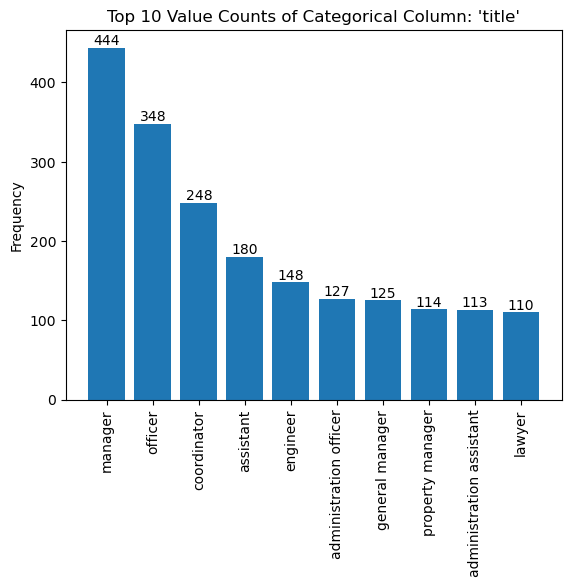

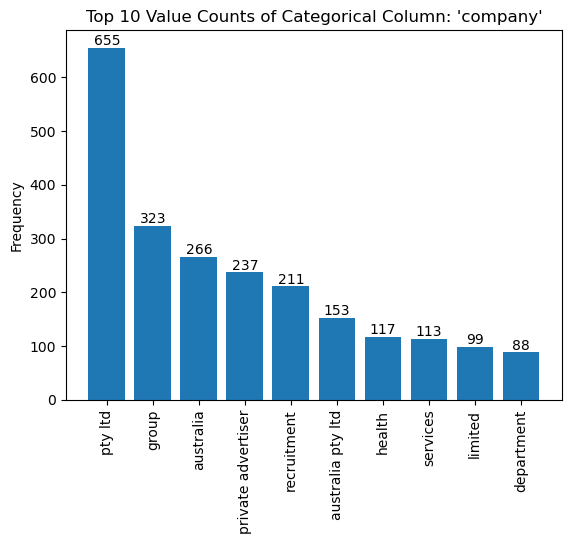

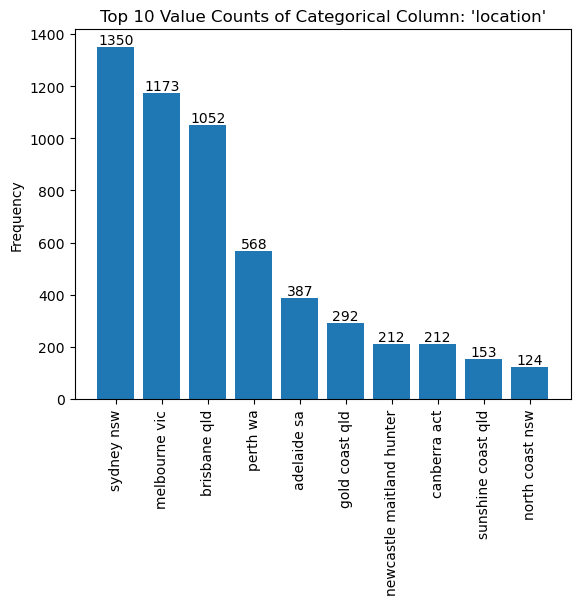

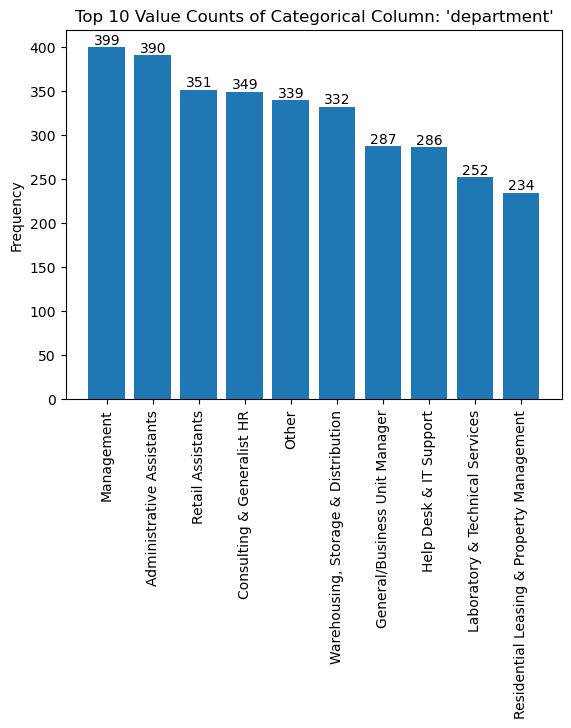

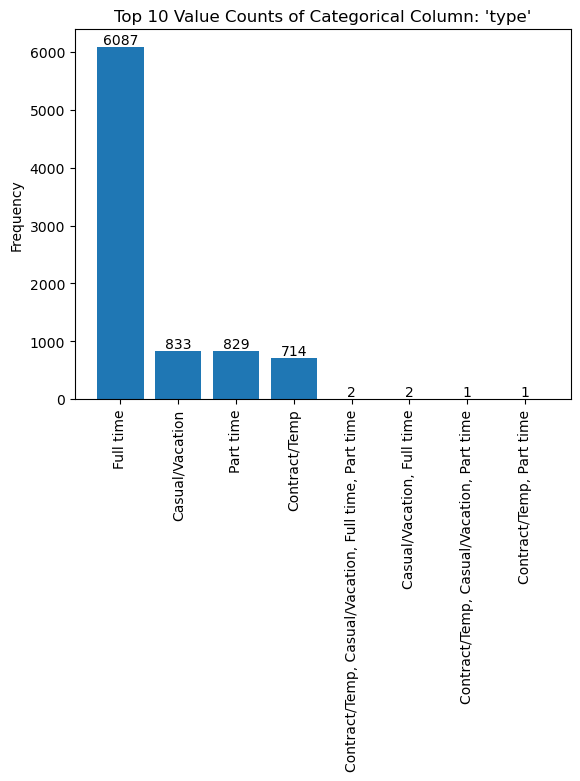

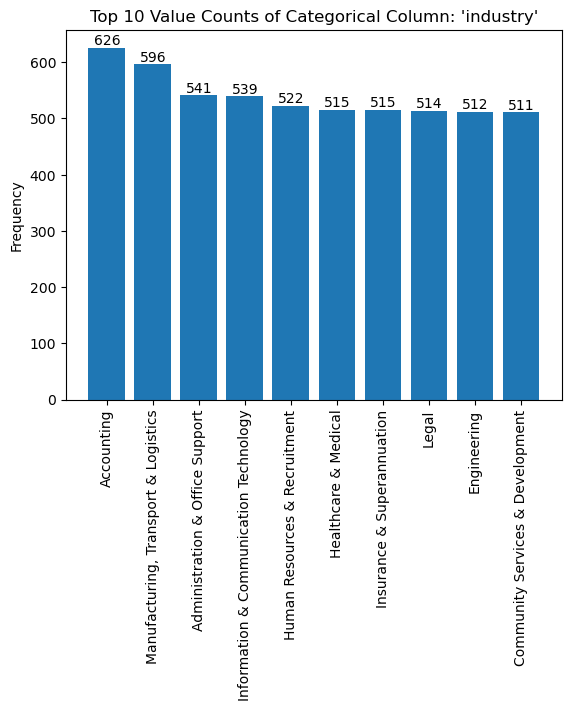

In [106]:
import matplotlib.pyplot as plt

def plot_categorical_vars_distribution(df, thresh=30, xticks_rotation=90):
    # select categorical columns
    categorical_colnames = df.select_dtypes(include=['object']).columns.to_list()
    
    # loop through categorical columns only
    for col in categorical_colnames:
        df_count = df[col].value_counts()[:thresh].reset_index()
        x = df_count['index']
        y = df_count[col]
        plt.bar(x, y)
        plt.title("Top "+str(thresh)+" Value Counts of Categorical Column: '" + col + "'")
        plt.xticks(rotation=xticks_rotation)
        plt.ylabel("Frequency")
        
        # annotate the bar values
        offset = max(y) * 0.02
        for x_val, y_val in zip(x, y):
            label = "{:.0f}".format(y_val)
            plt.annotate(label, (x_val, y_val + offset), ha='center', va='center')
            
        plt.show()

plot_categorical_vars_distribution(df, thresh=10)

__Due to the high number of unique values we just plotted the value counts for the top 10 most frequent unique values__ on each categorical column.

Now let's __plot the numerical columns using histograms and boxplots.__

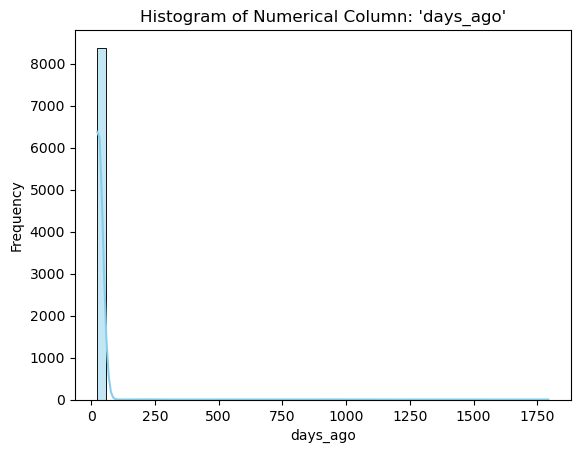

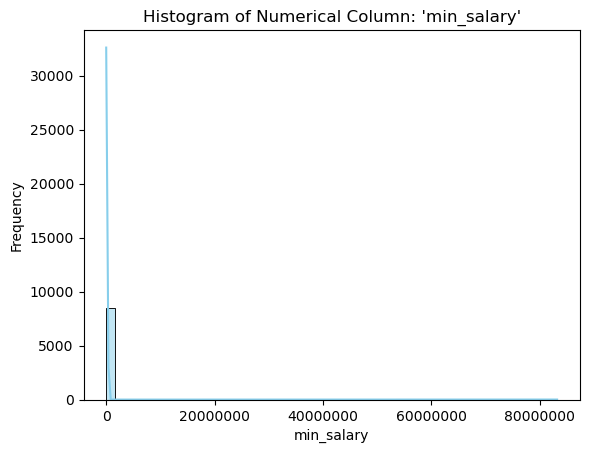

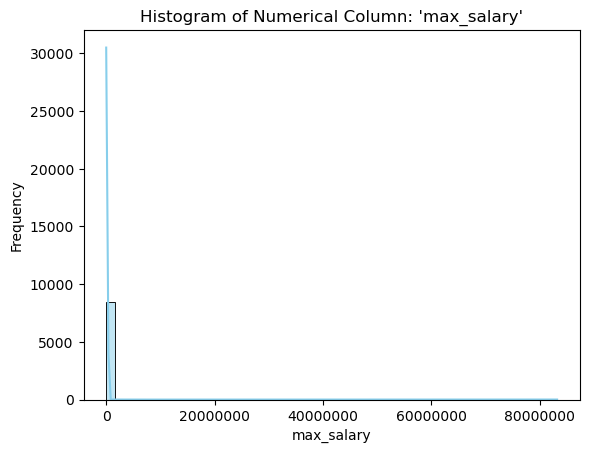

In [145]:
import seaborn as sns

def plot_numerical_vars_distribution(df, thresh=-1, plot='histogram'):
    # select numerical columns
    numerical_colnames = df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns.to_list()
    
    # loop through numerical columns only
    for col in numerical_colnames:
        # plot using seaborn
        if thresh == -1: thresh = -len(df)
        if plot == 'histogram':
            sns.histplot(sorted(df[col])[:-thresh], bins=50, kde=True, color='skyblue', edgecolor='black')
            plt.ticklabel_format(style='plain', axis='x')
            plt.ylabel("Frequency")
            plt.xlabel(col)
        elif plot == 'boxplot':
            sns.boxplot(sorted(df[col])[:-thresh], color='skyblue')
            plt.ylabel(col)
        
        # set title and labels
        plt.title(plot.title() + " of Numerical Column: '" + col + "'")
        plt.show()

plot_numerical_vars_distribution(df)

Our histograms __demonstrate extreme values at the right end of the plot__.

Let's __remove these points from our plots using the thresh parameter.__

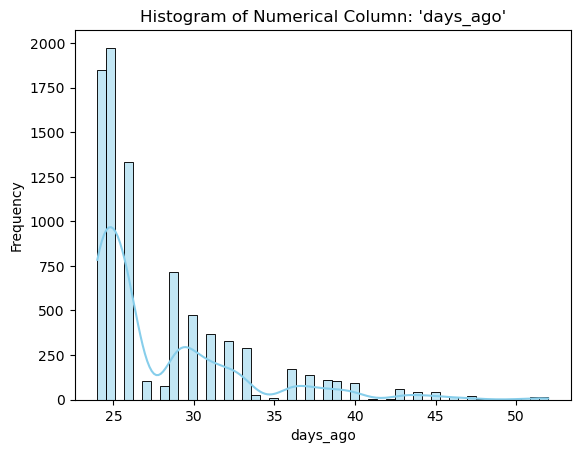

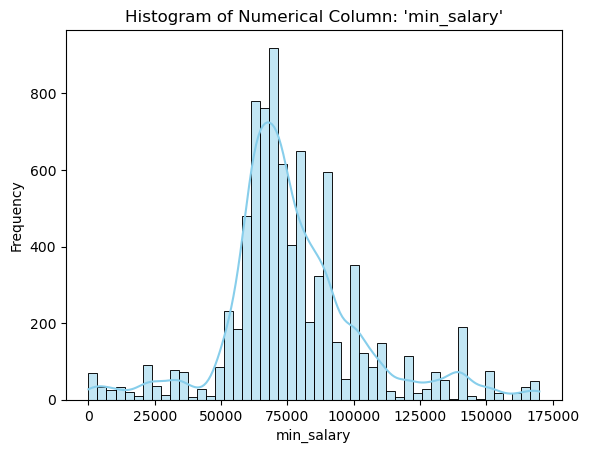

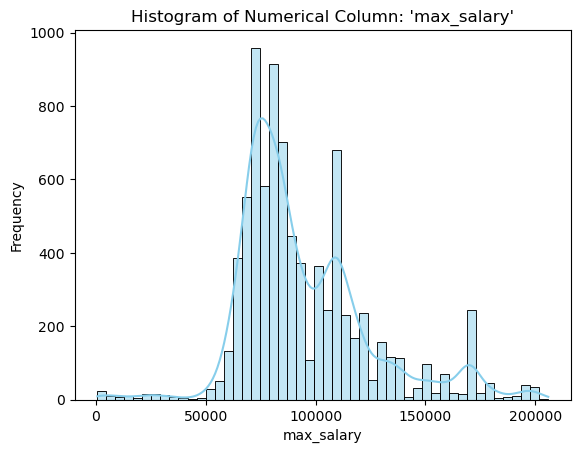

In [146]:
# plotting histograms without top 100 values from the right
plot_numerical_vars_distribution(df, thresh=100)

Now we truly see were the majority of our data is.

Let's plot boxplots.

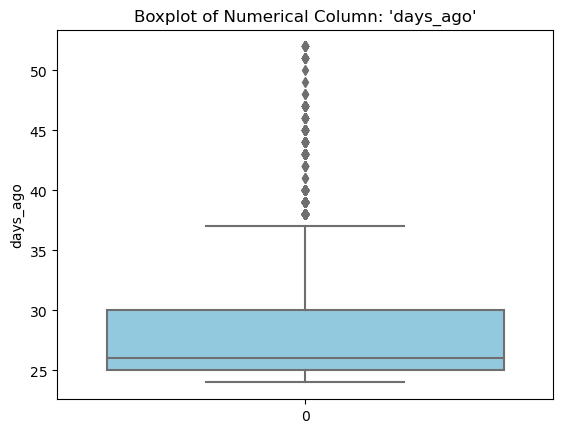

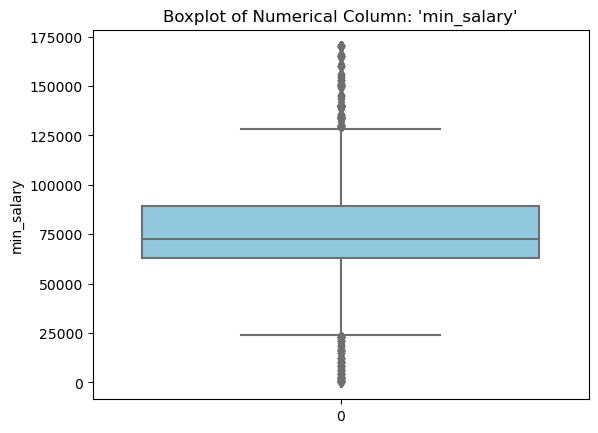

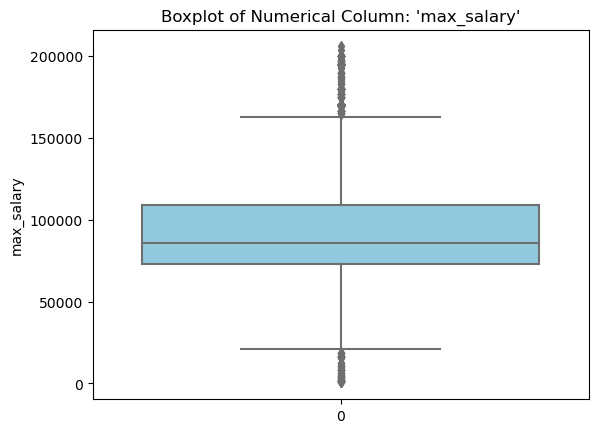

In [147]:
plot_numerical_vars_distribution(df, thresh=100, plot='boxplot')

Finally we will calculate the __skewness and kurtosis for each numerical column__.

In [151]:
def display_skewness_and_kurtosis_numerical_vars(df):
    # select numerical columns
    numerical_colnames = df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns.to_list()
    
    # loop through numerical columns only
    for col in numerical_colnames:
        print("Evaluating NUMERICAL COLUMN: '" + col + "'")
        print("Skewness: %f" % df[col].skew())
        print("Kurtosis: %f" % df[col].kurt())
        print("-"*40)
        
display_skewness_and_kurtosis_numerical_vars(df)

Evaluating NUMERICAL COLUMN: 'days_ago'
Skewness: 12.670476
Kurtosis: 169.171790
----------------------------------------
Evaluating NUMERICAL COLUMN: 'min_salary'
Skewness: 91.872361
Kurtosis: 8450.000465
----------------------------------------
Evaluating NUMERICAL COLUMN: 'max_salary'
Skewness: 91.769229
Kurtosis: 8437.288564
----------------------------------------


### Step 4. Pandas profiling for EDA (exploratory data analysis)

To generate the report we need to install some dependencies and then we are able to generate using ydata_profiling module.

In [158]:
# !pip install --upgrade Pillow

In [154]:
# !pip install ydata_profiling

In [159]:
from ydata_profiling import ProfileReport

profile_report = ProfileReport(df, title="Pandas_Profiling_Report")

profile_report.to_file('Pandas_Profiling_Report.html')

D:\Anaconda\Lib\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Step 5. Encoding methods, creating new numerical columns

In [160]:
df_safe5 = df.copy()

### Step 9. Unsupervised learning methods

In [ ]:
clean_data = df2.copy()
clean_data = clean_data[['title', 'company', 'location', 'daysAgo', 'typeMapped', 'minSalary', 'maxSalary']]
clean_data.head()

In [ ]:
clean_data.dtypes

In [ ]:
### Crea un modelo de KMeans para clusterizar los datos
##Apply encoding to the categorical columns
from sklearn.cluster import KMeans


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


for col in clean_data.select_dtypes(include=['object']).columns:
    clean_data[col + '_encoded'] = le.fit_transform(clean_data[col])


df_econded = clean_data[['daysAgo', 'typeMapped', 'minSalary', 'maxSalary', 'title_encoded', 'company_encoded', 'location_encoded']]

In [ ]:
df_econded.head()

In [ ]:
## check null values

df_econded.isnull().sum()

In [ ]:
## For now i will drop the null values
df_econded = df_econded.dropna()

In [ ]:
### Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_econded_scaled = scaler.fit_transform(df_econded)


In [ ]:
### Elbow method to find the best number of clusters


import matplotlib.pyplot as plt
import seaborn as sns

def plot_elbow_method(df, max_clusters):
    wcss = []
    for i in range(1, max_clusters):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, max_clusters), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

plot_elbow_method(df_econded_scaled, 11)

Best clusterin K value is 4. We will use KMeans to cluster our data.

In [ ]:
### cluster k=3

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df_econded_scaled)


In [ ]:
### Create a new column with the cluster number

df_econded['cluster'] = kmeans.labels_
df_econded.head()

In [ ]:
### Visualize the clusters

def plot_clusters(df, x, y, hue):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x, y=y, hue=hue, palette='deep')
    plt.title('Clusters')
    plt.show()

plot_clusters(df_econded, 'minSalary', 'maxSalary', 'cluster')